In [1]:
from scipy.optimize import minimize
import sys
sys.path.append('../gefera')
import gefera as gf

import matplotlib.pyplot as plt

In [112]:
np.exp(-6.4)

0.001661557273173934

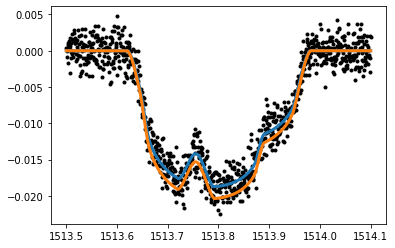

In [113]:
a1 = 124.7 * ac.R_sun.value / ac.au.value
t1 = 16.57
e1 = 0.00001
p1 = 130.194
w1 = 90.0 * np.pi / 180
i1 = 89.92 * np.pi / 180

a2 = 61.5 * ac.R_sun.value / ac.au.value
t2 = 12.41
e2 = 0.00001
p2 = 45.154
w2 = 0.1 * np.pi / 180
om2 = 150 * np.pi / 180
i2 = 89.78 * np.pi / 180

u1 = 0.5
u2 = 0.3
r1 = 0.1
r2 = 0.07

o1 = gf.PrimaryOrbit(a1, t1, e1, p1, w1, i1)
o2 = gf.ConfocalOrbit(a2, t2, e2, p2, om2, w2, i2)
sys = gf.ConfocalSystem(o1, o2)

t = np.linspace(1513.5, 1514.1, 1000)
lc_true = sys.lightcurve(t, u1, u2, r1, r2, grad=True)
bp, bpm, theta, dbp, dbpm, dtheta = sys.impacts(t, grad=True)

r1 = 0.105
r2 = 0.072
lc = sys.lightcurve(t, u1, u2, r1, r2, grad=True)
bp, bpm, theta, dbp, dbpm, dtheta = sys.impacts(t, grad=True)

y = lc_true[0] + np.random.randn(len(t)) * 0.001661557273173934
plt.plot(t, y, '.', color='k')
plt.plot(t, lc_true[0], linewidth=3)
plt.plot(t, lc[0], linewidth=3)

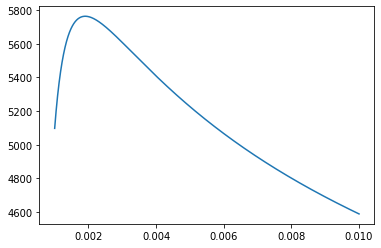

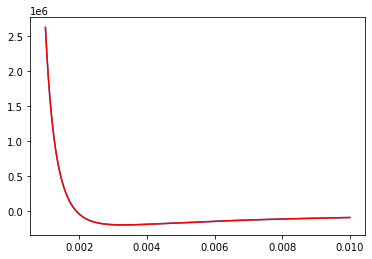

In [114]:
#['a1', 't1', 'e1', 'p1', 'w1', 'i1', 'a2', 't2', 'e2', 'p2', 'o2', 'w2', 'i2', 'r1', 'r2', 'u1', 'u2']

r = np.logspace(-3, -2, 1000)

ll_grad = np.zeros_like(r)
ll = np.zeros_like(r)
for i in range(len(ll)):
    o1 = gf.PrimaryOrbit(a1, t1, e1, p1, w1, i1)
    o2 = gf.ConfocalOrbit(a2, t2, e2, p2, om2, w2, i2)
    sys = gf.ConfocalSystem(o1, o2)
    ll[i] = sys.loglike(y, t, u1, u2, r1, r2, r[i], grad=False)
    ll_grad[i] = sys.loglike(y, t, u1, u2, r1, r2, r[i], grad=True)[1][0]

plt.plot(r, ll)
plt.figure()
plt.plot(r[1:] - np.diff(r)[0]/2, np.diff(ll) / np.diff(r))
plt.plot(r, ll_grad, color='r')

In [115]:
a1 = 124.7 * ac.R_sun.value / ac.au.value
t1 = 16.57
e1 = 0.00001
p1 = 130.194
w1 = 90.0 * np.pi / 180
i1 = 89.92 * np.pi / 180

a2 = 61.5 * ac.R_sun.value / ac.au.value
t2 = 12.41
e2 = 0.00001
p2 = 45.154
w2 = 0.1 * np.pi / 180
om2 = 150 * np.pi / 180
i2 = 89.78 * np.pi / 180

u1 = 0.5
u2 = 0.3
r1 = 0.1
r2 = 0.07

x0 = [0.001, a1, t1, e1, p1, w1, i1, a2, t2, e2, p2, w2, om2, i2, r1, r2, u1, u2]

o1 = gf.PrimaryOrbit(a1, t1, e1, p1, w1, i1)
o2 = gf.ConfocalOrbit(a2, t2, e2, p2, om2, w2, i2)
sys = gf.ConfocalSystem(o1, o2)
fit = sys.lightcurve(t, u1, u2, r1, r2, grad=True)
print(np.sum(fit[1]['a2']))

9.577212043811144


CPU times: user 1.08 s, sys: 9.01 ms, total: 1.09 s
Wall time: 1.15 s
-5689.0059449445325
CPU times: user 212 ms, sys: 3.9 ms, total: 215 ms
Wall time: 216 ms
-5886.268296584714


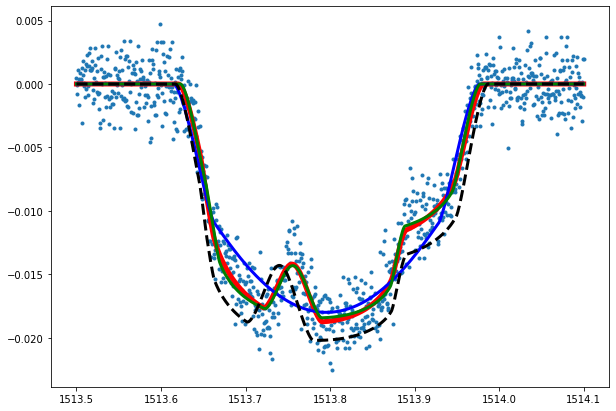

In [119]:
a1 = 124 * ac.R_sun.value / ac.au.value
t1 = 16.571
e1 = 0.00001
p1 = 130.194
w1 = 90.0 * np.pi / 180
i1 = 89.95 * np.pi / 180

a2 = 61.5 * ac.R_sun.value / ac.au.value
t2 = 12.41
e2 = 0.00001
p2 = 45.154
w2 = 0.1 * np.pi / 180
om2 = 150.5 * np.pi / 180
i2 = 89.78 * np.pi / 180

u1 = 0.3
u2 = 0.3
r1 = 0.11
r2 = 0.072

def fun(args):
    sigma, a1, t1, e1, p1, w1, i1, a2, t2, e2, p2, om2, w2, i2, r1, r2, u1, u2 = args
    o1 = gf.PrimaryOrbit(a1, t1, e1, p1, w1, i1)
    o2 = gf.ConfocalOrbit(a2, t2, e2, p2, om2, w2, i2)
    sys = gf.ConfocalSystem(o1, o2)
    ll = sys.loglike(y, t, u1, u2, r1, r2, sigma, grad=False, sign=-1)
    return ll

def fun_jac(args):
    sigma, a1, t1, e1, p1, w1, i1, a2, t2, e2, p2, om2, w2, i2, r1, r2, u1, u2 = args
    o1 = gf.PrimaryOrbit(a1, t1, e1, p1, w1, i1)
    o2 = gf.ConfocalOrbit(a2, t2, e2, p2, om2, w2, i2)
    sys = gf.ConfocalSystem(o1, o2)
    ll = sys.loglike(y, t, u1, u2, r1, r2, sigma, grad=True, sign=-1)
    return ll

x0 = [0.001, a1, t1, e1, p1, w1, i1, a2, t2, e2, p2, om2, w2, i2, r1, r2, u1, u2]

%time res = minimize(fun, x0, jac=False, method='BFGS')
print(fun(res.x))

sigma, a1, t1, e1, p1, w1, i1, a2, t2, e2, p2, om2, w2, i2, r1, r2, u1, u2 = res.x
o1 = gf.PrimaryOrbit(a1, t1, e1, p1, w1, i1)
o2 = gf.ConfocalOrbit(a2, t2, e2, p2, om2, w2, i2)
sys = gf.ConfocalSystem(o1, o2)
fit = sys.lightcurve(t, u1, u2, r1, r2, grad=False)

%time res = minimize(fun_jac, x0, jac=True, method='TNC')
print(fun(res.x))

sigma, a1, t1, e1, p1, w1, i1, a2, t2, e2, p2, om2, w2, i2, r1, r2, u1, u2 = res.x
o1 = gf.PrimaryOrbit(a1, t1, e1, p1, w1, i1)
o2 = gf.ConfocalOrbit(a2, t2, e2, p2, om2, w2, i2)
sys = gf.ConfocalSystem(o1, o2)
fit_jac = sys.lightcurve(t, u1, u2, r1, r2, grad=False)

sigma, a1, t1, e1, p1, w1, i1, a2, t2, e2, p2, om2, w2, i2, r1, r2, u1, u2 = x0
o1 = gf.PrimaryOrbit(a1, t1, e1, p1, w1, i1)
o2 = gf.ConfocalOrbit(a2, t2, e2, p2, om2, w2, i2)
sys = gf.ConfocalSystem(o1, o2)
start = sys.lightcurve(t, u1, u2, r1, r2, grad=False)

plt.figure(figsize=(10, 7))
plt.plot(t, y, '.')
plt.plot(t, lc_true[0], color='r', linewidth=5)
plt.plot(t, fit, color='b', linewidth=3)
plt.plot(t, fit_jac, color='g', linewidth=3)
plt.plot(t, start, '--', color='k', linewidth=3)
#print(res)

In [ ]:
sigma, a1, t1, e1, p1, w1, i1, a2, t2, e2, p2, om2, w2, i2, r1, r2, u1, u2

In [ ]:
0.001, a1, t1, e1, p1, w1, i1, a2, t2, e2, p2, om2, w2, i2, r2, r1, u1, u2

In [ ]:
sigma, a1, t1, e1, p1, w1, i1, a2, t2, e2, p2, om2, w2, i2, r2, r1, u1, u2 = res.x
o1 = gf.PrimaryOrbit(a1, t1, e1, p1, w1, i1)
o2 = gf.ConfocalOrbit(a2, t2, e2, p2, om2, w2, i2)
sys = gf.ConfocalSystem(o1, o2)
plt.plot(t, sys.lightcurve(t, u1, u2, r1, r2))

In [ ]:
np.hstack([[0], np.sum(np.array(list(lc[1].values())), axis=1)])

In [ ]:
list(lc[1].keys())

In [ ]:
sys.loglike(y, t, u1, u2, r1, r2, 0.001, grad=True)[1][14]